In [1]:
# pip install webdriver-manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [68]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from datetime import datetime
import time
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

In [4]:
s=Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s)
driver

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - There is no [win32] chromedriver for browser 95.0.4638 in cache
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/95.0.4638.69/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\PRASHANT KASHYAP\.wdm\drivers\chromedriver\win32\95.0.4638.69]


<selenium.webdriver.chrome.webdriver.WebDriver (session="6e30470699df864d222aff5ad7b85e2e")>

In [ ]:
# Load the url of Instagram Login page
driver.get('https://www.instagram.com/')

# Implicitly Wait to load Website
driver.implicitly_wait(10)

# Enter Username and Password
driver.find_element_by_name('username').send_keys('sample username')
driver.find_element_by_name('password').send_keys('sample password')

# Now click to Login Button
driver.find_element_by_xpath('//button[@type="submit"]').click()

In [6]:
# Click the Not now button to do not save info
driver.find_elements_by_xpath('//button[@type="button"]')[1].click()

In [7]:
# click the Not now button to do not turn on of Notification
driver.find_elements_by_xpath('//div[@class="mt3GC"]/button')[1].click()

## Question 1

### **Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.**

1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3.Depict this information using a suitable graph.

In [99]:
# Enter the 'food' word in the search box
driver.find_element_by_xpath('//input[@placeholder="Search"]').send_keys('food')

In [100]:

d={}
handels=[]
count=0

# get hadles url in list "handels"
for i in driver.find_elements_by_xpath('//div[@role="none"]/a'):
    if i.text.split()[0][0]!='#':
        handels.append(i.get_attribute('href'))

# get followers list of obtained hadles and save in a dictionsry "d"
while count<10:
    driver.get(handels[count])
    fol=driver.find_element_by_xpath('//a[@class="-nal3 "]/span').get_attribute('title').split(',')
    followers=int(fol[0]+fol[1])
    d[followers]=handels[count]
    count+=1
    driver.back()

In [101]:
# get the followers count list in 'fol_no' and sort it
fol_no=list(d.keys())
fol_no.sort(reverse=True)

# now print top 5 hadles who have most followers
for i in range(0,5):
    print(d[fol_no[i]].split('/')[3])

official_food_hub
peppa_foodie
foodtalkindia
foodozers
food


In [102]:
user_handles=[]
post_count=[]

# Now we run loop and get post data from top 5 hadles
for i in range(0,5):
    
    driver.get(d[fol_no[i]])
    no_of_post=0
    # Now click On first post
    driver.find_element_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]').click()
    
    while True:
        
        # get date of post and replace ',' with ''
        date_of_post=driver.find_element_by_xpath('//time[@class="_1o9PC Nzb55"]').get_attribute('title')
        date_of_post = date_of_post.replace(',', '')
        
        # now change date format in calculatable format
        post_date = datetime.strptime(date_of_post, '%b %d %Y').date()
        
        # get the current date and chage format in calculatable format
        current_date = datetime.today().strftime('%Y-%m-%d')
        current_date = datetime.strptime(current_date, '%Y-%m-%d').date()
        
        # calculate the difference between dates
        difference_in_date = (current_date-post_date).days
        
        # break the loop if difference of date is greater then 3
        if difference_in_date>3:
            break
        
        # go to next post
        driver.find_element_by_xpath('//div[@class=" l8mY4 feth3"]/button').click()
        no_of_post+=1
    
    user_handles.append(d[fol_no[i]].split('/')[3])
    post_count.append(no_of_post)
# Now click on close button
driver.find_elements_by_xpath('//button[@class="wpO6b  "]')[-1].click()

In [103]:
# Back to main Page
driver.find_element_by_xpath('//a[@href="/"]').click()

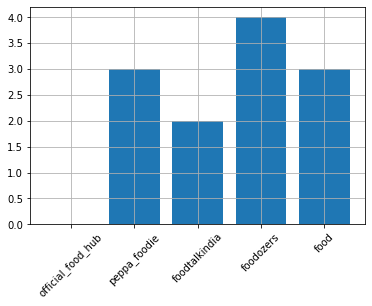

In [104]:
# Depict this information using a suitable graph.
plt.bar(user_handles,post_count)
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Question 2

### **Your friend also needs a list of hashtags that he should use in his posts.**

1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3. Create a csv file with two columns : the word and its frequency
4. Now, find the hashtags that were most popular among these bloggers
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [105]:
texts=""

# Run loop to get post content of top 5 handles
for i in range(0,5):
    
    driver.get(d[fol_no[i]])
    no_of_post=0

    # Now click On first post
    driver.find_element_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]').click()
    
    while no_of_post<10:
        
        # get the text data in 'text'
        content=driver.find_element_by_xpath('//div[@class="C4VMK"]/span')
        text=BeautifulSoup(content.get_attribute('outerHTML'),'html.parser').find('span').text
        
        # Add content of every post in "texts"
        texts = texts + str(" ") + str(text)
        driver.find_element_by_xpath('//div[@class=" l8mY4 feth3"]/button').click()
        no_of_post+=1
        
# Now click on close button
driver.find_elements_by_xpath('//button[@class="wpO6b  "]')[-1].click()

In [106]:
# Special characters to be removed
characters_not_required = "[-/\"/=/+/“/”/*/-/👀/📷/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/0-9/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"

In [107]:
hastag_dictionary={}
words_dictionary={}

# split word by space and save in "words"
words = texts.split(" ")
for word in words:
    
    # Removing special characters
    word = re.sub(characters_not_required, "", word)
    if word!="":
        
        # if word is a hashtag then store in the hastag_dictionary then store in the words_dictionary
        if word[0]=="#":
            hastag_dictionary[word] = hastag_dictionary.get(word,0)+1
            continue
        words_dictionary[word] = words_dictionary.get(word,0)+1

In [108]:
words = [ key for key,value in words_dictionary.items()]
word_frequency = [ value for key,value in words_dictionary.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}
# Dataframe created using Pandas which will help us to create the CSV file
words_df = pd.DataFrame(columns)
# Create the CSV file without Index values
words_df.to_csv(r'WordFrequency.csv', index=False)

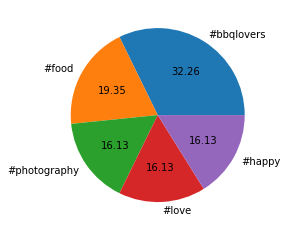

In [109]:
# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = [[value,key] for key,value in hastag_dictionary.items()]
hastag_with_frequency.sort(reverse=True)

# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()

In [110]:
# Back to main Page
driver.find_element_by_xpath('//a[@href="/"]').click()

## Question 3

### **You need to also calculate average followers : likes ratio for the obtained handles.**

1. Followers : Likes ratio is calculated as follows:
2. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
3. Calculate the average likes for a handle.
4. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
5. Create a bar graph to depict the above obtained information.

In [112]:
likes_of_handles=[]

# Run the loop to get total likes of top 10 posts of top 5 handles
for i in range(0,5):
    
    driver.get(d[fol_no[i]])
    no_of_post=0
    total_likes=0

    # Now click On first post
    driver.find_element_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]').click()
    
    # Run loop for top 10 posts
    while no_of_post<10:
        
        # get post's likes in variable 'likes'
        like_data = driver.find_element_by_xpath("//section[@class='EDfFK ygqzn']")
        likes = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser').find('span').text.replace(',','')
        
        # If post is a picture then it shows only likes but if it is a video then it is show views
        if "views" not in likes:
            total_likes += int(likes)
            post_for_like+=1
        else:
            
            # click on views button to get likes data
            button_like = driver.find_element_by_xpath('//span[contains(.," views")]')
            driver.execute_script("arguments[0].click();", button_like)
            like_data = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//section[@class='EDfFK ygqzn']//div[contains(.,' likes')]")))
            like_html_data = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser')
            likes = int(like_html_data.find(class_ = 'vJRqr').find('span').text.replace(",",''))
            
            # add likes of every post in the total_likes
            total_likes +=likes
        
        # get the next post
        driver.find_element_by_xpath('//div[@class=" l8mY4 feth3"]/button').click()
        no_of_post+=1
        
    # store total likes of every handle in likes_of_handles    
    likes_of_handles.append(total_likes)
        
# Now click on close button
driver.find_elements_by_xpath('//button[@class="wpO6b  "]')[-1].click()

In [113]:
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
# To store the average_likes for each handle
average_likes_list = []
for i in range(5):
    average_likes = likes_of_handles[i]/10
    average_likes_list.append(average_likes)
    print(d[fol_no[i]].split('/')[3],format(average_likes,".0f"))

---------------------------------
Average Likes
---------------------------------
official_food_hub 27
peppa_foodie 16532
foodtalkindia 253
foodozers 14588
food 512


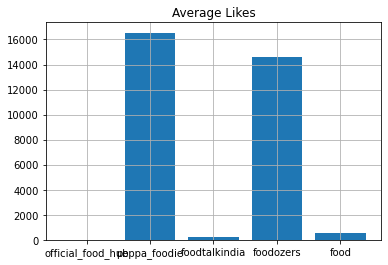

In [114]:
# Plot a bar graph to depict the above obtained information.
plt.bar(user_handles,average_likes_list)
plt.title('Average Likes')
plt.grid()
plt.show()

In [115]:
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = []
for i in range(5):
    avg_followers_count = int(fol_no[i]/average_likes_list[i])
    avg_followers.append(avg_followers_count)
    print(d[fol_no[i]].split('/')[3],avg_followers_count,':',int(average_likes_list[i]))

---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
official_food_hub 27119 : 26
peppa_foodie 18 : 16532
foodtalkindia 1213 : 253
foodozers 17 : 14587
food 292 : 512


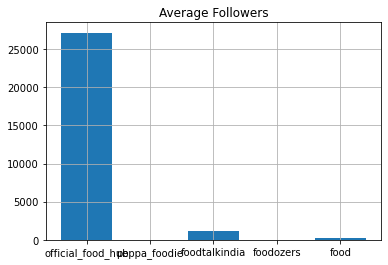

In [116]:
# Create a bar graph to depict the above obtained information.
plt.bar(user_handles,avg_followers)
plt.title('Average Followers')
plt.grid()
plt.show()


In [117]:
driver.quit()